In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import os
from collections import Counter
import re
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')

In [2]:
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [3]:


#Load và khám phá dữ liệu cơ bản
def load_and_explore_data():
    """Load và khám phá dữ liệu từ các file đã crawl"""

    print("=" * 60)
    print("KHÁM PHÁ DỮ LIỆU LINKS THUỐC")
    print("=" * 60)

    links_file = r"D:\OU\DoAn\DrugRecommandation\crawlData_LongChau\danh_muc_links\longchau_medicines_links.csv"
    df_links = None
    if os.path.exists(links_file):
        df_links = pd.read_csv(links_file, encoding='utf-8-sig')
        print(f"Tổng số bản ghi links: {len(df_links)}")
        print(f"Số cột: {df_links.shape[1]}")
        print(f"Các cột: {list(df_links.columns)}")
        print(f"Kích thước dữ liệu: {df_links.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

        # Thống kê theo ký tự
        if 'Ký tự' in df_links.columns:
            char_stats = df_links['Ký tự'].value_counts()
            print("\nThống kê theo ký tự:")
            for char, count in char_stats.head(10).items():
                print(f" {char}: {count} thuốc")
    else:
        print("Chưa có file links")


    print("\n" + "=" * 60)
    print("KHÁM PHÁ DỮ LIỆU CHI TIẾT THUỐC")
    print("=" * 60)

    detail_file = r"D:\OU\DoAn\DrugRecommandation\crawlData_LongChau\LongChau_rawData.csv"
    df_details = None
    if os.path.exists(detail_file):
        df_details = pd.read_csv(detail_file, encoding='utf-8')
        print(f"Tổng số thuốc chi tiết: {len(df_details)}")
        print(f"Số cột: {df_details.shape[1]}")
        print(f"Các cột: {list(df_details.columns)}")

        # Kiểm tra missing values
        missing_stats = df_details.isnull().sum()
        missing_percent = (missing_stats / len(df_details)) * 100
        print("\nThống kê dữ liệu thiếu:")
        for col in df_details.columns:
            if missing_stats[col] > 0:
                print(f" {col}: {missing_stats[col]} ({missing_percent[col]:.1f}%)")
    else:
        print("Chưa có file dữ liệu chi tiết")

    return df_links, df_details


# Chạy khám phá dữ liệu
df_links, df_details = load_and_explore_data()


KHÁM PHÁ DỮ LIỆU LINKS THUỐC
Tổng số bản ghi links: 5672
Số cột: 4
Các cột: ['Tên thuốc', 'Link', 'Ký tự', 'Trang']
Kích thước dữ liệu: 2.22 MB

Thống kê theo ký tự:
 A: 595 thuốc
 C: 521 thuốc
 S: 443 thuốc
 M: 401 thuốc
 T: 370 thuốc
 P: 354 thuốc
 D: 341 thuốc
 B: 301 thuốc
 L: 260 thuốc
 N: 248 thuốc

KHÁM PHÁ DỮ LIỆU CHI TIẾT THUỐC
Tổng số thuốc chi tiết: 5672
Số cột: 12
Các cột: ['url', 'ten_thuoc', 'gia', 'hinh_anh', 'thanh_phan', 'cong_dung', 'chong_chi_dinh', 'lieu_dung', 'luu_y', 'tac_dung_phu', 'bao_quan', 'mo_ta']

Thống kê dữ liệu thiếu:


PHÂN TÍCH DỮ LIỆU LINKS CHI TIẾT
Tổng số thuốc: 5,672
Số link duy nhất: 5,672
Tỷ lệ trùng lặp: 0.00%


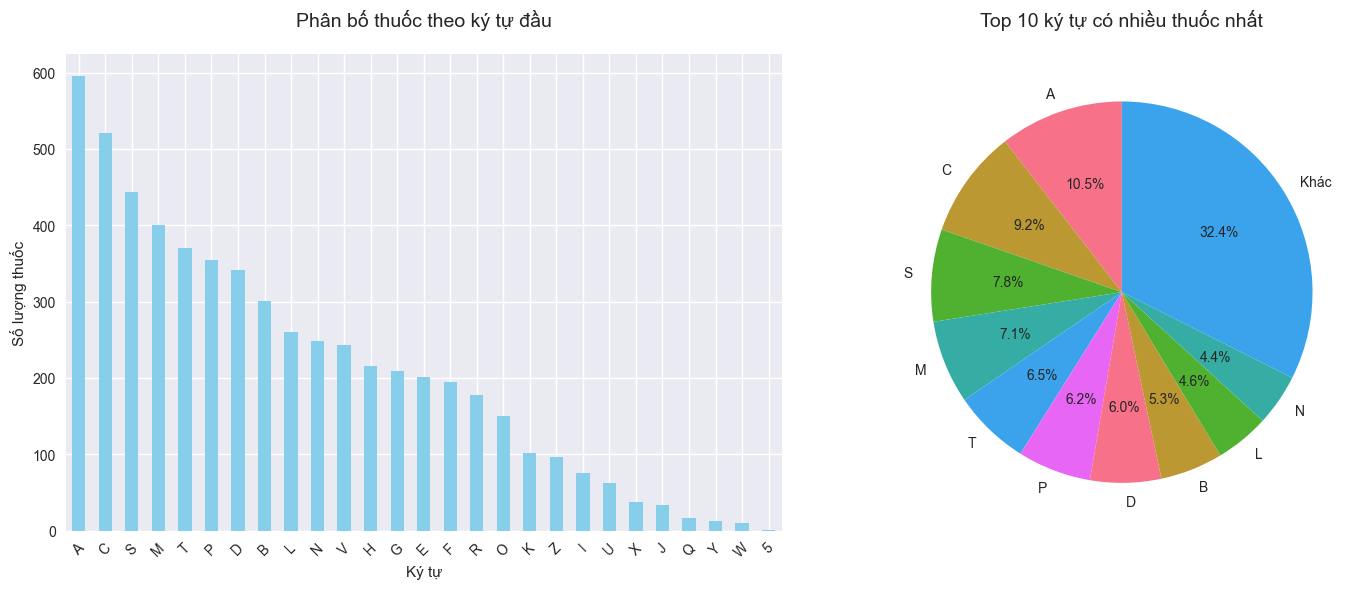


Top 10 ký tự có nhiều thuốc:
    1. A: 595 thuốc
    2. C: 521 thuốc
    3. S: 443 thuốc
    4. M: 401 thuốc
    5. T: 370 thuốc
    6. P: 354 thuốc
    7. D: 341 thuốc
    8. B: 301 thuốc
    9. L: 260 thuốc
   10. N: 248 thuốc

Phân tích tên thuốc:
Độ dài tên trung bình: 82.7 ký tự
Tên ngắn nhất: 33 ký tự
Tên dài nhất: 133 ký tự

Top 15 từ khóa phổ biến trong tên thuốc:
   • trị: 4,570 lần
   • điều: 4,519 lần
   • viên: 4,501 lần
   • thuốc: 3,899 lần
   • viêm: 1,434 lần
   • đau: 722 lần
   • nhiễm: 715 lần
   • bệnh: 699 lần
   • huyết: 644 lần


In [ ]:
# Cell 3: Phân tích dữ liệu links
def analyze_links_data(df_links):
    """Phân tích chi tiết dữ liệu links"""
    if df_links is None:
        print("Không có dữ liệu links để phân tích")
        return
     
    # 1. Thống kê cơ bản
    print(f"Tổng số thuốc: {len(df_links):,}")
    print(f"Số link duy nhất: {df_links['Link'].nunique():,}")
    print(f"Tỷ lệ trùng lặp: {((len(df_links) - df_links['Link'].nunique()) / len(df_links) * 100):.2f}%")
    
    # 2. Phân bố theo ký tự
    if 'Ký tự' in df_links.columns:
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
        
        # Biểu đồ cột
        char_counts = df_links['Ký tự'].value_counts()
        char_counts.plot(kind='bar', ax=ax1, color='skyblue')
        ax1.set_title('Phân bố thuốc theo ký tự đầu', fontsize=14, pad=20)
        ax1.set_xlabel('Ký tự')
        ax1.set_ylabel('Số lượng thuốc')
        ax1.tick_params(axis='x', rotation=45)
        
        # Biểu đồ pie cho top 10
        top_chars = char_counts.head(10)
        other_sum = char_counts.iloc[10:].sum()
        if other_sum > 0:
            top_chars['Khác'] = other_sum
        
        ax2.pie(top_chars.values, labels=top_chars.index, autopct='%1.1f%%', startangle=90)
        ax2.set_title('Top 10 ký tự có nhiều thuốc nhất', fontsize=14, pad=20)
        
        plt.tight_layout()
        plt.show()
        
        print(f"\nTop 10 ký tự có nhiều thuốc:")
        for i, (char, count) in enumerate(char_counts.head(10).items(), 1):
            print(f"   {i:2d}. {char}: {count:,} thuốc")
    
    # 3. Phân tích tên thuốc
    if 'Tên thuốc' in df_links.columns:
        print(f"\nPhân tích tên thuốc:")
        
        # Độ dài tên thuốc
        name_lengths = df_links['Tên thuốc'].str.len()
        print(f"Độ dài tên trung bình: {name_lengths.mean():.1f} ký tự")
        print(f"Tên ngắn nhất: {name_lengths.min()} ký tự")
        print(f"Tên dài nhất: {name_lengths.max()} ký tự")
        
        # Từ khóa phổ biến trong tên thuốc
        all_names = ' '.join(df_links['Tên thuốc'].astype(str))
        words = re.findall(r'\b\w+\b', all_names.lower())
        word_freq = Counter(words)
        
        print(f"\nTop 15 từ khóa phổ biến trong tên thuốc:")
        for word, freq in word_freq.most_common(15):
            if len(word) > 2:  # Bỏ qua từ quá ngắn
                print(f"   • {word}: {freq:,} lần")

# Chạy phân tích links
analyze_links_data(df_links)

PHÂN TÍCH DỮ LIỆU CHI TIẾT THUỐC
Độ đầy đủ dữ liệu theo trường:
ten_thuoc           : 5672/5672 (100.0%)
gia                 : 5672/5672 (100.0%)
hinh_anh            : 5672/5672 (100.0%)
thanh_phan          : 5672/5672 (100.0%)
cong_dung           : 5672/5672 (100.0%)
chong_chi_dinh      : 5672/5672 (100.0%)
lieu_dung           : 5672/5672 (100.0%)
luu_y               : 5672/5672 (100.0%)
tac_dung_phu        : 5672/5672 (100.0%)
bao_quan            : 5672/5672 (100.0%)
mo_ta               : 5672/5672 (100.0%)


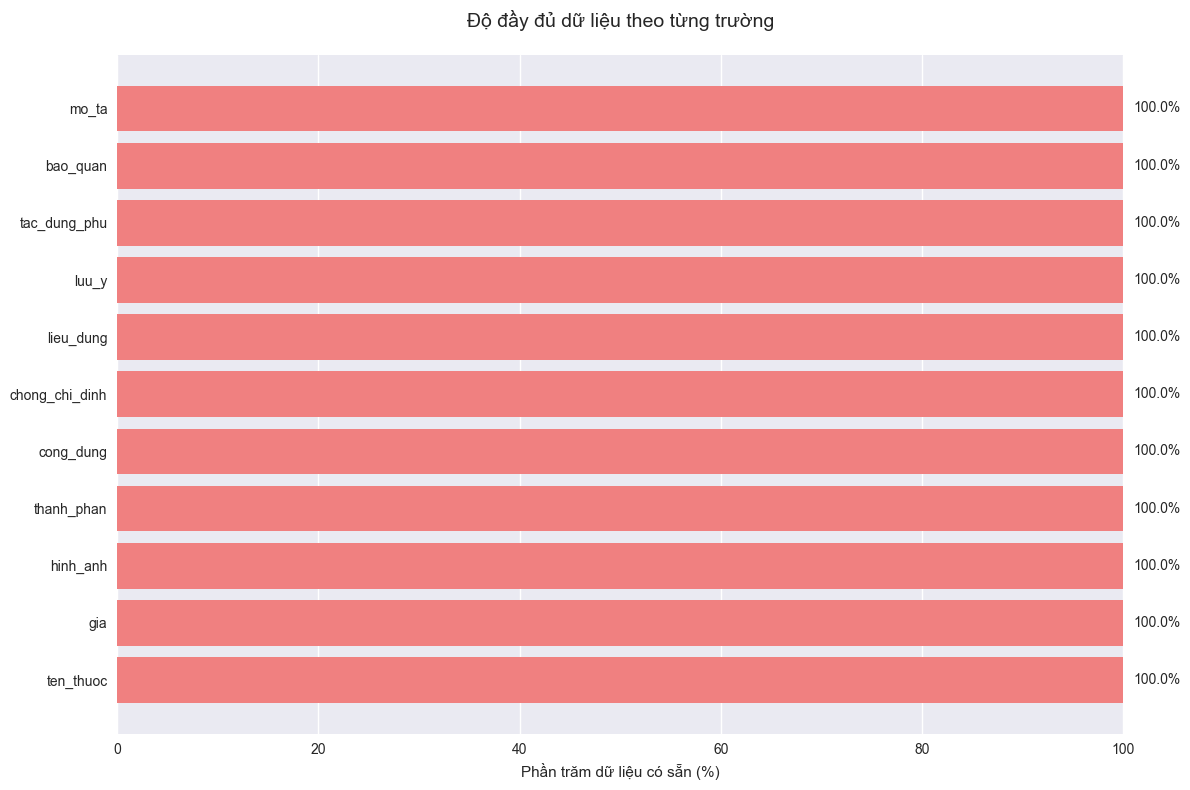


Phân tích giá thuốc:
Số thuốc có giá: 1198
Giá trung bình: 114 VNĐ
Giá trung vị: 31 VNĐ
Giá thấp nhất: 1 VNĐ
Giá cao nhất: 980 VNĐ


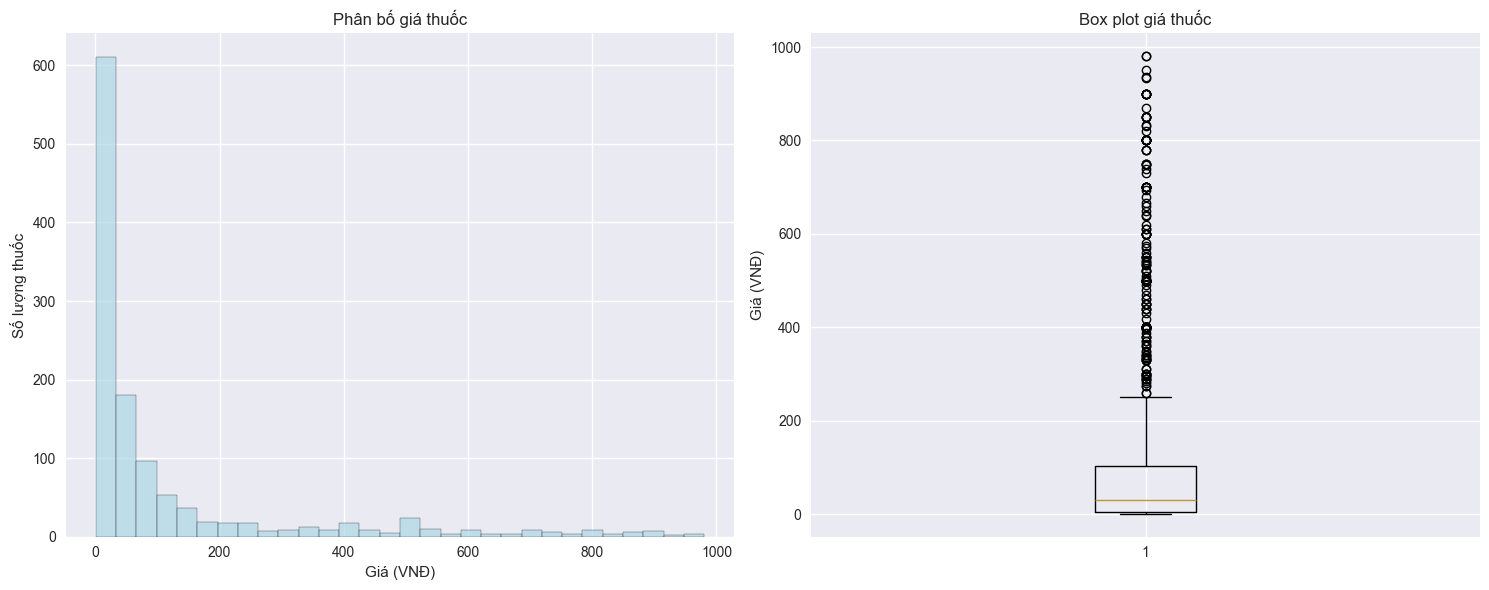

In [5]:
#Phân tích dữ liệu chi tiết thuốc
def analyze_medicine_details(df_details):
    """Phân tích chi tiết dữ liệu thuốc"""
    if df_details is None:
        print(" Không có dữ liệu chi tiết để phân tích")
        return
    
    print("=" * 60)
    print("PHÂN TÍCH DỮ LIỆU CHI TIẾT THUỐC")
    print("=" * 60)
    
    # 1. Thống kê độ đầy đủ dữ liệu
    completeness = {}
    for col in df_details.columns:
        if col not in ['url', 'URL']:
            non_null = df_details[col].notna().sum()
            completeness[col] = {
                'count': non_null,
                'percentage': (non_null / len(df_details)) * 100
            }
    
    # Sắp xếp theo độ đầy đủ
    sorted_completeness = sorted(completeness.items(), 
                               key=lambda x: x[1]['percentage'], 
                               reverse=True)
    
    print(f"Độ đầy đủ dữ liệu theo trường:")
    for field, stats in sorted_completeness:
        print(f"{field:20}: {stats['count']:4d}/{len(df_details)} ({stats['percentage']:5.1f}%)")
    
    # 2. Visualize completeness
    fig, ax = plt.subplots(figsize=(12, 8))
    fields = [item[0] for item in sorted_completeness]
    percentages = [item[1]['percentage'] for item in sorted_completeness]
    
    bars = ax.barh(fields, percentages, color='lightcoral')
    ax.set_xlabel('Phần trăm dữ liệu có sẵn (%)')
    ax.set_title('Độ đầy đủ dữ liệu theo từng trường', fontsize=14, pad=20)
    ax.set_xlim(0, 100)
    
    # Thêm labels
    for i, (bar, pct) in enumerate(zip(bars, percentages)):
        ax.text(bar.get_width() + 1, bar.get_y() + bar.get_height()/2, 
                f'{pct:.1f}%', va='center', fontsize=10)
    
    plt.tight_layout()
    plt.show()
    
    # 3. Phân tích giá thuốc
    if any(col in df_details.columns for col in ['gia', 'Giá']):
        price_col = 'gia' if 'gia' in df_details.columns else 'Giá'
        print(f"\nPhân tích giá thuốc:")
        
        # Làm sạch dữ liệu giá
        prices_raw = df_details[price_col].dropna()
        prices_clean = []
        
        for price in prices_raw:
            if isinstance(price, str):
                # Trích xuất số từ chuỗi giá
                numbers = re.findall(r'[\d,]+', price)
                if numbers:
                    try:
                        clean_price = float(numbers[0].replace(',', ''))
                        if clean_price > 0:
                            prices_clean.append(clean_price)
                    except:
                        continue
        
        if prices_clean:
            prices_series = pd.Series(prices_clean)
            print(f"Số thuốc có giá: {len(prices_clean)}")
            print(f"Giá trung bình: {prices_series.mean():,.0f} VNĐ")
            print(f"Giá trung vị: {prices_series.median():,.0f} VNĐ")
            print(f"Giá thấp nhất: {prices_series.min():,.0f} VNĐ")
            print(f"Giá cao nhất: {prices_series.max():,.0f} VNĐ")
            
            # Phân bố giá
            fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
            
            # Histogram
            ax1.hist(prices_series, bins=30, alpha=0.7, color='lightblue', edgecolor='black')
            ax1.set_xlabel('Giá (VNĐ)')
            ax1.set_ylabel('Số lượng thuốc')
            ax1.set_title('Phân bố giá thuốc')
            
            # Box plot
            ax2.boxplot(prices_series)
            ax2.set_ylabel('Giá (VNĐ)')
            ax2.set_title('Box plot giá thuốc')
            
            plt.tight_layout()
            plt.show()

# Chạy phân tích chi tiết
analyze_medicine_details(df_details)

PHÂN TÍCH THÀNH PHẦN VÀ CÔNG DỤNG
Phân tích thành phần thuốc:

Top 15 thành phần phổ biến:
   • 500mg: 519 lần
   • 10mg: 448 lần
   • 100mg: 375 lần
   • 50mg: 359 lần
   • 20mg: 321 lần
   • 200mg: 289 lần
   • 40mg: 240 lần
   • 300mg: 197 lần
   • 250mg: 189 lần
   • 25mg: 151 lần
   • 400mg: 144 lần
   • paracetamol: 135 lần
   • 30mg: 129 lần
   • 15mg: 123 lần
   • 150mg: 120 lần


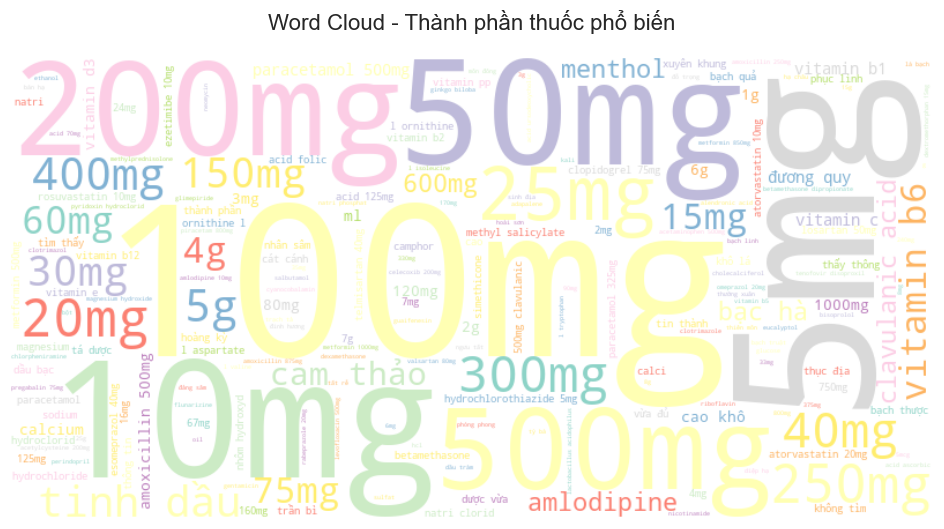


Phân tích công dụng thuốc:

Top 20 từ khóa trong công dụng:
trong: 11703 lần
thuốc: 11658 lần
định: 10946 lần
trường: 9654 lần
điều: 7404 lần
viêm: 6777 lần
bệnh: 6665 lần
dùng: 5929 lần
được: 5428 lần
chống: 4593 lần
nhiễm: 3519 lần
hoặc: 3289 lần
chứng: 3244 lần
khuẩn: 3004 lần
nhân: 2808 lần
đường: 2365 lần
huyết: 2310 lần
tính: 2288 lần
người: 2231 lần
giảm: 2114 lần


In [6]:
# Phân tích thành phần và công dụng thuốc
def analyze_medicine_content(df_details):
    """Phân tích nội dung thành phần và công dụng"""
    if df_details is None:
        return
    
    print("=" * 60)
    print("PHÂN TÍCH THÀNH PHẦN VÀ CÔNG DỤNG")
    print("=" * 60)
    
    # 1. Phân tích thành phần
    ingredient_cols = [col for col in df_details.columns 
                      if any(keyword in col.lower() for keyword in ['thanh_phan', 'thành phần', 'ingredients'])]
    
    if ingredient_cols:
        print("Phân tích thành phần thuốc:")
        ingredient_col = ingredient_cols[0]
        
        # Lấy tất cả thành phần
        all_ingredients = []
        ingredients_data = df_details[ingredient_col].dropna()
        
        for ingredients in ingredients_data:
            if isinstance(ingredients, str):
                # Tách các thành phần
                parts = re.split(r'[,;:\n]', ingredients.lower())
                for part in parts:
                    clean_part = re.sub(r'[^\w\s]', ' ', part).strip()
                    if len(clean_part) > 3:
                        all_ingredients.append(clean_part)
        
        if all_ingredients:
            ingredient_freq = Counter(all_ingredients)
            print(f"\nTop 15 thành phần phổ biến:")
            for ingredient, freq in ingredient_freq.most_common(15):
                print(f"   • {ingredient}: {freq} lần")
            
            # Word cloud cho thành phần
            if len(all_ingredients) > 10:
                try:
                    wordcloud = WordCloud(width=800, height=400, 
                                        background_color='white',
                                        colormap='Set3').generate(' '.join(all_ingredients))
                    
                    plt.figure(figsize=(12, 6))
                    plt.imshow(wordcloud, interpolation='bilinear')
                    plt.axis('off')
                    plt.title('Word Cloud - Thành phần thuốc phổ biến', fontsize=16, pad=20)
                    plt.show()
                except:
                    print("Không thể tạo word cloud cho thành phần")
    
    # 2. Phân tích công dụng
    indication_cols = [col for col in df_details.columns 
                      if any(keyword in col.lower() for keyword in ['cong_dung', 'công dụng', 'indication', 'chi_dinh', 'chỉ định'])]
    
    if indication_cols:
        print(f"\nPhân tích công dụng thuốc:")
        indication_col = indication_cols[0]
        
        # Lấy tất cả công dụng
        all_indications = []
        indications_data = df_details[indication_col].dropna()
        
        for indication in indications_data:
            if isinstance(indication, str):
                # Làm sạch text
                clean_text = re.sub(r'[^\w\s]', ' ', indication.lower())
                words = clean_text.split()
                # Lọc từ có ý nghĩa
                meaningful_words = [word for word in words 
                                  if len(word) > 3 and word not in ['không', 'tìm', 'thấy', 'thông', 'tin']]
                all_indications.extend(meaningful_words)
        
        if all_indications:
            indication_freq = Counter(all_indications)
            print(f"\nTop 20 từ khóa trong công dụng:")
            for word, freq in indication_freq.most_common(20):
                print(f"{word}: {freq} lần")

# Chạy phân tích thành phần
analyze_medicine_content(df_details)

PHÂN TÍCH CHẤT LƯỢNG DỮ LIỆU
Thống kê chất lượng dữ liệu:
Trường               Null%    Vô nghĩa%    Chất lượng% 
------------------------------------------------------------
ten_thuoc            0.0    % 0.0        % 100.0      %
hinh_anh             0.0    % 0.0        % 100.0      %
thanh_phan           0.0    % 0.6        % 99.4       %
mo_ta                0.0    % 2.5        % 97.5       %
lieu_dung            0.0    % 5.7        % 94.3       %
cong_dung            0.0    % 6.3        % 93.7       %
chong_chi_dinh       0.0    % 8.9        % 91.1       %
bao_quan             0.0    % 10.4       % 89.6       %
tac_dung_phu         0.0    % 24.0       % 76.0       %
luu_y                0.0    % 81.5       % 18.5       %
gia                  0.0    % 100.0      % 0.0        %


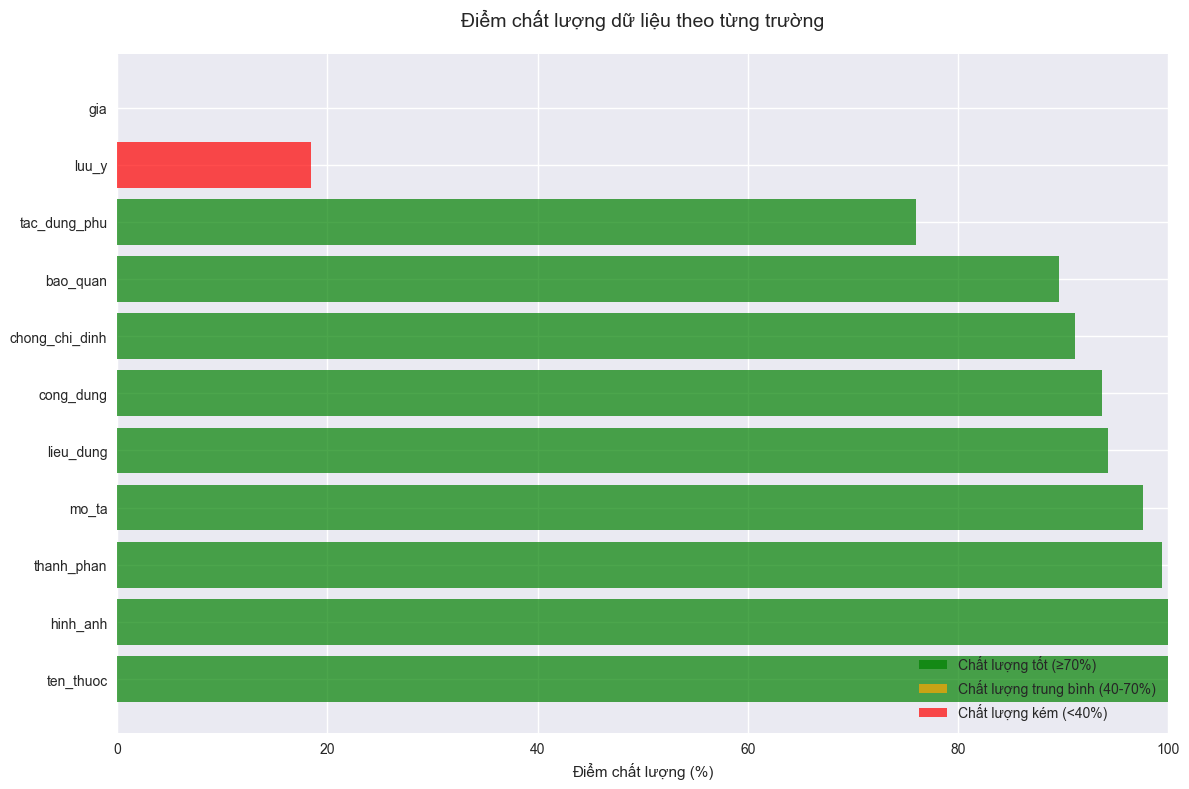


Đánh giá tổng quát:
 Điểm chất lượng trung bình: 78.2%
 Chất lượng dữ liệu tốt


In [7]:
# Phân tích chất lượng dữ liệu
def analyze_data_quality(df_details):
    """Phân tích chất lượng và độ tin cậy của dữ liệu"""
    if df_details is None:
        return
    
    print("=" * 60)
    print("PHÂN TÍCH CHẤT LƯỢNG DỮ LIỆU")
    print("=" * 60)
    
    # 1. Kiểm tra dữ liệu trống hoặc không có ý nghĩa
    meaningless_patterns = [
        'không tìm thấy',
        'không có',
        'n/a',
        'chưa có',
        'đang cập nhật'
    ]
    
    quality_stats = {}
    
    for col in df_details.columns:
        if col not in ['url', 'URL']:
            total_records = len(df_details)
            non_null = df_details[col].notna().sum()
            
            # Đếm các giá trị có ý nghĩa
            meaningful_count = 0
            for value in df_details[col].dropna():
                if isinstance(value, str):
                    is_meaningful = True
                    value_lower = value.lower()
                    for pattern in meaningless_patterns:
                        if pattern in value_lower:
                            is_meaningful = False
                            break
                    if is_meaningful and len(value.strip()) > 10:
                        meaningful_count += 1
                else:
                    meaningful_count += 1
            
            quality_stats[col] = {
                'total': total_records,
                'non_null': non_null,
                'meaningful': meaningful_count,
                'null_rate': ((total_records - non_null) / total_records) * 100,
                'meaningless_rate': ((non_null - meaningful_count) / total_records) * 100,
                'quality_score': (meaningful_count / total_records) * 100
            }
    
    # Hiển thị thống kê chất lượng
    print("Thống kê chất lượng dữ liệu:")
    print(f"{'Trường':<20} {'Null%':<8} {'Vô nghĩa%':<12} {'Chất lượng%':<12}")
    print("-" * 60)
    
    sorted_quality = sorted(quality_stats.items(), 
                          key=lambda x: x[1]['quality_score'], 
                          reverse=True)
    
    for field, stats in sorted_quality:
        print(f"{field:<20} {stats['null_rate']:<7.1f}% {stats['meaningless_rate']:<11.1f}% {stats['quality_score']:<11.1f}%")
    
    # 2. Visualize chất lượng dữ liệu
    fields = [item[0] for item in sorted_quality]
    quality_scores = [item[1]['quality_score'] for item in sorted_quality]
    
    plt.figure(figsize=(12, 8))
    colors = ['green' if score >= 70 else 'orange' if score >= 40 else 'red' 
              for score in quality_scores]
    
    bars = plt.barh(fields, quality_scores, color=colors, alpha=0.7)
    plt.xlabel('Điểm chất lượng (%)')
    plt.title('Điểm chất lượng dữ liệu theo từng trường', fontsize=14, pad=20)
    plt.xlim(0, 100)
    
    # Thêm legend
    from matplotlib.patches import Patch
    legend_elements = [
        Patch(facecolor='green', alpha=0.7, label='Chất lượng tốt (≥70%)'),
        Patch(facecolor='orange', alpha=0.7, label='Chất lượng trung bình (40-70%)'),
        Patch(facecolor='red', alpha=0.7, label='Chất lượng kém (<40%)')
    ]
    plt.legend(handles=legend_elements, loc='lower right')
    
    plt.tight_layout()
    plt.show()
    
    # 3. Đánh giá tổng quát
    avg_quality = np.mean(quality_scores)
    print(f"\nĐánh giá tổng quát:")
    print(f" Điểm chất lượng trung bình: {avg_quality:.1f}%")
    
    if avg_quality >= 70:
        print(" Chất lượng dữ liệu tốt")
    elif avg_quality >= 40:
        print(" Chất lượng dữ liệu trung bình, cần cải thiện")
    else:
        print(" Chất lượng dữ liệu kém, cần crawl lại")

# Chạy phân tích chất lượng
analyze_data_quality(df_details)

In [8]:
# Tạo báo cáo tổng hợp
def generate_summary_report(df_links, df_details):
    """Tạo báo cáo tổng hợp về bộ dữ liệu"""
    
    print("=" * 80)
    print("BÁO CÁO TỔNG HỢP BỘ DỮ LIỆU LONG CHÂU")
    print("=" * 80)
    
    report = {
        'timestamp': pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S'),
        'links_data': {},
        'details_data': {},
        'recommendations': []
    }
    
    # 1. Thống kê dữ liệu links
    if df_links is not None:
        report['links_data'] = {
            'total_records': len(df_links),
            'unique_links': df_links['Link'].nunique(),
            'duplicate_rate': ((len(df_links) - df_links['Link'].nunique()) / len(df_links)) * 100,
            'characters_covered': df_links['Ký tự'].nunique() if 'Ký tự' in df_links.columns else 0
        }
        
        print(f"DỮ LIỆU LINKS:")
        print(f"Tổng số bản ghi: {report['links_data']['total_records']:,}")
        print(f"Link duy nhất: {report['links_data']['unique_links']:,}")
        print(f"Tỷ lệ trùng lặp: {report['links_data']['duplicate_rate']:.2f}%")
        print(f"Ký tự đã cover: {report['links_data']['characters_covered']}")
    
    # 2. Thống kê dữ liệu chi tiết
    if df_details is not None:
        # Tính độ đầy đủ trung bình
        completeness_scores = []
        for col in df_details.columns:
            if col not in ['url', 'URL']:
                completeness = (df_details[col].notna().sum() / len(df_details)) * 100
                completeness_scores.append(completeness)
        
        avg_completeness = np.mean(completeness_scores) if completeness_scores else 0
        
        report['details_data'] = {
            'total_medicines': len(df_details),
            'total_fields': len(df_details.columns),
            'avg_completeness': avg_completeness,
            'best_field': None,
            'worst_field': None
        }
        
        if completeness_scores:
            best_idx = np.argmax(completeness_scores)
            worst_idx = np.argmin(completeness_scores)
            fields = [col for col in df_details.columns if col not in ['url', 'URL']]
            report['details_data']['best_field'] = fields[best_idx]
            report['details_data']['worst_field'] = fields[worst_idx]
        
        print(f"\n DỮ LIỆU CHI TIẾT:")
        print(f"Số thuốc chi tiết: {report['details_data']['total_medicines']:,}")
        print(f"Số trường dữ liệu: {report['details_data']['total_fields']}")
        print(f"Độ đầy đủ trung bình: {avg_completeness:.1f}%")
        print(f"Trường tốt nhất: {report['details_data']['best_field']}")
        print(f"Trường cần cải thiện: {report['details_data']['worst_field']}")
    
    # 3. Đánh giá và khuyến nghị
    print(f"\nĐÁNH GIÁ VÀ KHUYẾN NGHỊ:")
    
    if df_links is not None and df_details is not None:
        coverage_rate = (len(df_details) / df_links['Link'].nunique()) * 100
        print(f"Tỷ lệ crawl chi tiết: {coverage_rate:.1f}%")
        
        if coverage_rate < 10:
            report['recommendations'].append("Cần crawl thêm dữ liệu chi tiết từ links đã có")
        
        if avg_completeness < 50:
            report['recommendations'].append("Cần cải thiện thuật toán crawl để tăng độ đầy đủ")
        
        if report['links_data']['duplicate_rate'] > 5:
            report['recommendations'].append("Cần làm sạch dữ liệu trùng lặp")
    
    if not report['recommendations']:
        report['recommendations'].append("Chất lượng dữ liệu tốt, có thể tiến hành phân tích sâu")
    
    for i, rec in enumerate(report['recommendations'], 1):
        print(f"   {i}. {rec}")
    
    # 4. Lưu báo cáo
    with open('data_exploration_report.json', 'w', encoding='utf-8') as f:
        json.dump(report, f, ensure_ascii=False, indent=2)
    
    print(f"\n Đã lưu báo cáo chi tiết vào: data_exploration_report.json")
    
    return report

# Tạo báo cáo tổng hợp
summary_report = generate_summary_report(df_links, df_details)

BÁO CÁO TỔNG HỢP BỘ DỮ LIỆU LONG CHÂU
DỮ LIỆU LINKS:
Tổng số bản ghi: 5,672
Link duy nhất: 5,672
Tỷ lệ trùng lặp: 0.00%
Ký tự đã cover: 27

 DỮ LIỆU CHI TIẾT:
Số thuốc chi tiết: 5,672
Số trường dữ liệu: 12
Độ đầy đủ trung bình: 100.0%
Trường tốt nhất: ten_thuoc
Trường cần cải thiện: ten_thuoc

ĐÁNH GIÁ VÀ KHUYẾN NGHỊ:
Tỷ lệ crawl chi tiết: 100.0%
   1. Chất lượng dữ liệu tốt, có thể tiến hành phân tích sâu

 Đã lưu báo cáo chi tiết vào: data_exploration_report.json


In [9]:
# Hàm tiện ích để khám phá nhanh
def quick_explore(field_name, df_details):
    """Khám phá nhanh một trường dữ liệu cụ thể"""
    if df_details is None or field_name not in df_details.columns:
        print(f"Không tìm thấy trường '{field_name}'")
        return
    
    print(f"KHÁM PHÁ NHANH TRƯỜNG: {field_name}")
    print("=" * 50)
    
    data = df_details[field_name].dropna()
    
    print(f"Thống kê cơ bản:")
    print(f"Số bản ghi có dữ liệu: {len(data)}")
    print(f"Tỷ lệ đầy đủ: {(len(data)/len(df_details))*100:.1f}%")
    
    if len(data) > 0:
        # Hiển thị mẫu dữ liệu
        print(f"\nMẫu dữ liệu (5 bản ghi đầu):")
        for i, value in enumerate(data.head().values, 1):
            sample = str(value)[:100] + "..." if len(str(value)) > 100 else str(value)
            print(f"   {i}. {sample}")
        
        # Thống kê độ dài nếu là text
        if data.dtype == 'object':
            lengths = data.str.len()
            print(f"\nThống kê độ dài text:")
            print(f"Trung bình: {lengths.mean():.1f} ký tự")
            print(f"Ngắn nhất: {lengths.min()} ký tự")
            print(f"Dài nhất: {lengths.max()} ký tự")

# Ví dụ sử dụng
print("Ví dụ khám phá nhanh:")
if df_details is not None:
    available_fields = [col for col in df_details.columns if col not in ['url', 'URL']]
    print(f"Các trường có sẵn: {available_fields}")
    print("\nSử dụng: quick_explore('tên_trường', df_details)")
    
    # Khám phá trường đầu tiên làm ví dụ
    if available_fields:
        quick_explore(available_fields[0], df_details)

Ví dụ khám phá nhanh:
Các trường có sẵn: ['ten_thuoc', 'gia', 'hinh_anh', 'thanh_phan', 'cong_dung', 'chong_chi_dinh', 'lieu_dung', 'luu_y', 'tac_dung_phu', 'bao_quan', 'mo_ta']

Sử dụng: quick_explore('tên_trường', df_details)
KHÁM PHÁ NHANH TRƯỜNG: ten_thuoc
Thống kê cơ bản:
Số bản ghi có dữ liệu: 5672
Tỷ lệ đầy đủ: 100.0%

Mẫu dữ liệu (5 bản ghi đầu):
   1. Thuốc 5-Fluorouracil 50mg Novartis điều trị giảm nhẹ trong nhiều loại ung thư (10ml)
   2. Thuốc Actadol 500 Medipharco điều trị các chứng đau và sốt từ nhẹ đến vừa (10 vỉ x 10 viên)
   3. Thuốc Allerphast 180mg Mebiphar điều trị viêm mũi dị ứng theo mùa, mày đay mạn tính vô căn (1 vỉ x 1...
   4. Siro Ambroxol Danapha điều trị viêm phế quản, hen phế quản (60ml)
   5. Thuốc mỡ bôi da Agiclovir 5% Agimexpharm điều trị nhiễm Herpes simplex, Herpes zoster, Herpes sinh d...

Thống kê độ dài text:
Trung bình: 82.7 ký tự
Ngắn nhất: 33 ký tự
Dài nhất: 133 ký tự


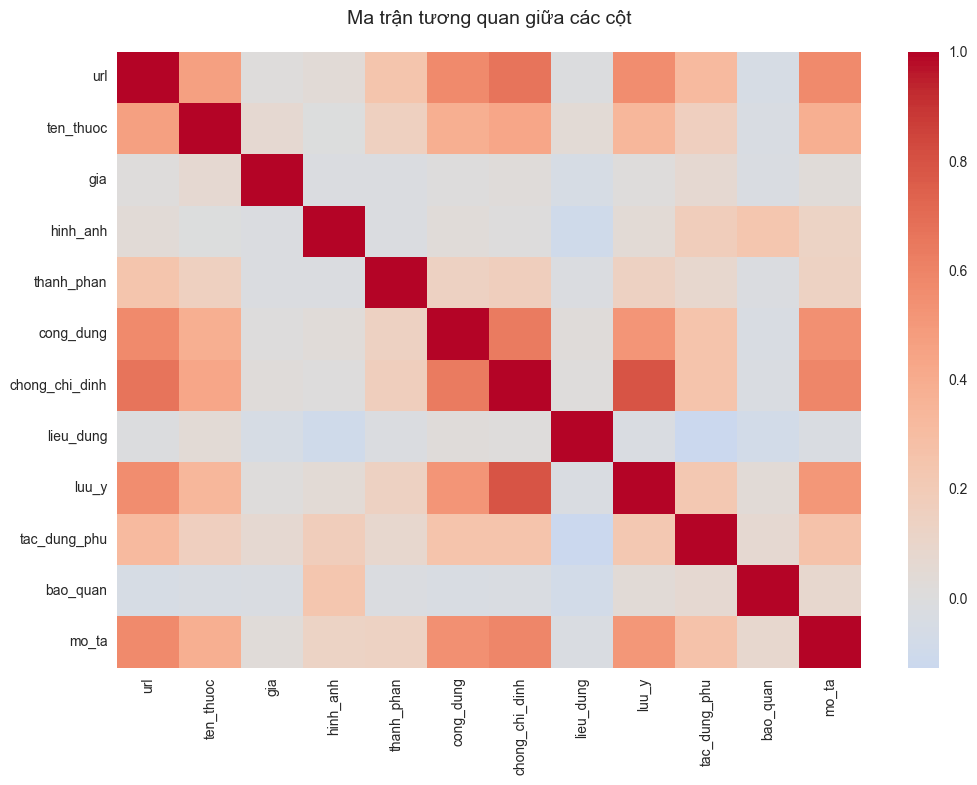


Các cặp cột có tương quan mạnh (|corr| >= 0.5):
luu_y ↔ chong_chi_dinh: 0.79
chong_chi_dinh ↔ luu_y: 0.79
url ↔ chong_chi_dinh: 0.67
chong_chi_dinh ↔ url: 0.67
chong_chi_dinh ↔ cong_dung: 0.63
cong_dung ↔ chong_chi_dinh: 0.63
mo_ta ↔ chong_chi_dinh: 0.59
chong_chi_dinh ↔ mo_ta: 0.59
mo_ta ↔ url: 0.58
url ↔ mo_ta: 0.58
url ↔ cong_dung: 0.57
cong_dung ↔ url: 0.57
luu_y ↔ url: 0.56
url ↔ luu_y: 0.56
mo_ta ↔ cong_dung: 0.54
cong_dung ↔ mo_ta: 0.54
cong_dung ↔ luu_y: 0.52
luu_y ↔ cong_dung: 0.52
mo_ta ↔ luu_y: 0.51
luu_y ↔ mo_ta: 0.51


In [10]:
from sklearn.preprocessing import LabelEncoder

def correlation_analysis(df):
    # Copy để tránh thay đổi dữ liệu gốc
    df_corr = df.copy()

    # Chỉ giữ các cột có thể encode (loại bỏ các cột toàn NaN hoặc có 1 giá trị duy nhất)
    valid_cols = [col for col in df_corr.columns if df_corr[col].nunique(dropna=True) > 1]
    df_corr = df_corr[valid_cols]

    # Encode các cột object (text) thành số
    for col in df_corr.select_dtypes(include=['object']).columns:
        le = LabelEncoder()
        df_corr[col] = le.fit_transform(df_corr[col].astype(str))

    # Tính ma trận tương quan Pearson
    corr_matrix = df_corr.corr(method='pearson')

    # Vẽ heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0)
    plt.title('Ma trận tương quan giữa các cột', fontsize=14, pad=20)
    plt.show()

    # In ra các cặp cột có tương quan mạnh
    threshold = 0.5  # Ngưỡng để coi là tương quan mạnh
    strong_corrs = []
    for col in corr_matrix.columns:
        for idx in corr_matrix.index:
            if col != idx and abs(corr_matrix.loc[idx, col]) >= threshold:
                strong_corrs.append((idx, col, corr_matrix.loc[idx, col]))
    strong_corrs = sorted(set(strong_corrs), key=lambda x: -abs(x[2]))

    print("\nCác cặp cột có tương quan mạnh (|corr| >= 0.5):")
    for c1, c2, corr_val in strong_corrs:
        print(f"{c1} ↔ {c2}: {corr_val:.2f}")

# Gọi hàm
correlation_analysis(df_details)


In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    silhouette_score, classification_report, accuracy_score, 
    precision_score, recall_score, f1_score, roc_auc_score
)
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.pipeline import Pipeline
from scipy.sparse import hstack

In [12]:
# Cell: Feature Engineering and Preprocessing (thay thế cell 11)
def create_advanced_features(df_details):
    """Create advanced features with multiple methods"""
    
    print("=== TẠO ĐẶC TRƯNG NÂNG CAO ===")
    
    if df_details is None:
        print("Không có dữ liệu để tạo features")
        return None, None, None
    
    # Prepare data
    df = df_details.copy()
    
    # Identify important text columns
    text_columns = []
    for col in df.columns:
        if any(keyword in col.lower() for keyword in ['ten_thuoc', 'thanh_phan', 'cong_dung']):
            if df[col].notna().sum() > 0:
                text_columns.append(col)
    
    print(f"Các cột text được sử dụng: {text_columns}")
    
    if not text_columns:
        print("Không tìm thấy cột text phù hợp")
        return None, None, None
    
    # Clean and combine text
    combined_text = []
    for idx in range(len(df)):
        text_parts = []
        for col in text_columns:
            if pd.notna(df.iloc[idx][col]):
                # Better text cleaning
                text = str(df.iloc[idx][col]).lower().strip()
                text = re.sub(r'[^\w\s]', ' ', text)  # Remove special characters
                text = ' '.join(text.split())  # Remove extra whitespace
                text_parts.append(text)
        combined_text.append(' '.join(text_parts))
    
    # Create TF-IDF features
    print("Đang tạo TF-IDF features...")
    
    # Main TF-IDF
    tfidf_main = TfidfVectorizer(
        max_features=500,
        min_df=3,
        max_df=0.8,
        ngram_range=(1, 3),  # Expand ngram
        stop_words=None,
        sublinear_tf=True
    )
    
    # Character-level TF-IDF
    tfidf_char = TfidfVectorizer(
        analyzer='char',
        max_features=200,
        min_df=5,
        max_df=0.7,
        ngram_range=(2, 5)
    )
    
    # Create features
    try:
        features_main = tfidf_main.fit_transform(combined_text)
        features_char = tfidf_char.fit_transform(combined_text)
        
        # Combine features
        from scipy.sparse import hstack
        combined_features = hstack([features_main, features_char])
        
        # Convert to DataFrame
        feature_names = ([f"tfidf_word_{i}" for i in range(features_main.shape[1])] + 
                        [f"tfidf_char_{i}" for i in range(features_char.shape[1])])
        
        features_df = pd.DataFrame(combined_features.toarray(), columns=feature_names)
        
        print(f"Đã tạo {features_df.shape[1]} đặc trưng tổng cộng")
        print(f"  - Word-level TF-IDF: {features_main.shape[1]} features")
        print(f"  - Character-level TF-IDF: {features_char.shape[1]} features")
        
        return features_df, tfidf_main, combined_text
        
    except Exception as e:
        print(f"Lỗi khi tạo features: {str(e)}")
        return None, None, None

def standardize_features(features_df):
    """Standardize feature data"""
    
    print("=== CHUẨN HÓA DỮ LIỆU ===")
    
    if features_df is None:
        print("Không có features để chuẩn hóa")
        return None, None
    
    # Standardize
    scaler = StandardScaler()
    features_scaled = scaler.fit_transform(features_df)
    features_scaled_df = pd.DataFrame(features_scaled, columns=features_df.columns)
    
    print(f"Đã chuẩn hóa {features_scaled_df.shape[1]} đặc trưng")
    print(f"Mean: {features_scaled_df.mean().mean():.6f}")
    print(f"Std: {features_scaled_df.std().mean():.6f}")
    
    return features_scaled_df, scaler

# Create features with error handling
print("\n" + "="*50)
print("FEATURE ENGINEERING")
print("="*50)

features_df, tfidf_vectorizer, combined_text = create_advanced_features(df_details)

if features_df is not None:
    features_scaled_df, scaler = standardize_features(features_df)
    print("Feature engineering completed successfully")
else:
    print("Feature engineering failed - creating dummy data for demo")
    # Create dummy data to prevent errors in subsequent cells
    features_df = pd.DataFrame(np.random.rand(100, 50), 
                              columns=[f"feature_{i}" for i in range(50)])
    features_scaled_df, scaler = standardize_features(features_df)
    tfidf_vectorizer = None
    combined_text = ["dummy text"] * 100


FEATURE ENGINEERING
=== TẠO ĐẶC TRƯNG NÂNG CAO ===
Các cột text được sử dụng: ['ten_thuoc', 'thanh_phan', 'cong_dung']
Đang tạo TF-IDF features...
Đã tạo 700 đặc trưng tổng cộng
  - Word-level TF-IDF: 500 features
  - Character-level TF-IDF: 200 features
=== CHUẨN HÓA DỮ LIỆU ===
Đã chuẩn hóa 700 đặc trưng
Mean: 0.000000
Std: 1.000088
Feature engineering completed successfully



MACHINE LEARNING TRAINING
=== HUẤN LUYỆN KMEANS CLUSTERING ===
n_clusters = 3: Silhouette Score = 0.047
n_clusters = 4: Silhouette Score = 0.048
n_clusters = 5: Silhouette Score = 0.056
n_clusters = 6: Silhouette Score = 0.055
n_clusters = 7: Silhouette Score = 0.053
n_clusters = 8: Silhouette Score = 0.053
n_clusters = 9: Silhouette Score = 0.056
n_clusters = 10: Silhouette Score = 0.059

Số cluster tối ưu: 10

Phân bố cluster:
  Cluster 0: 1561 thuốc (27.5%)
  Cluster 1: 804 thuốc (14.2%)
  Cluster 2: 247 thuốc (4.4%)
  Cluster 3: 710 thuốc (12.5%)
  Cluster 4: 708 thuốc (12.5%)
  Cluster 5: 165 thuốc (2.9%)
  Cluster 6: 663 thuốc (11.7%)
  Cluster 7: 369 thuốc (6.5%)
  Cluster 8: 183 thuốc (3.2%)
  Cluster 9: 262 thuốc (4.6%)


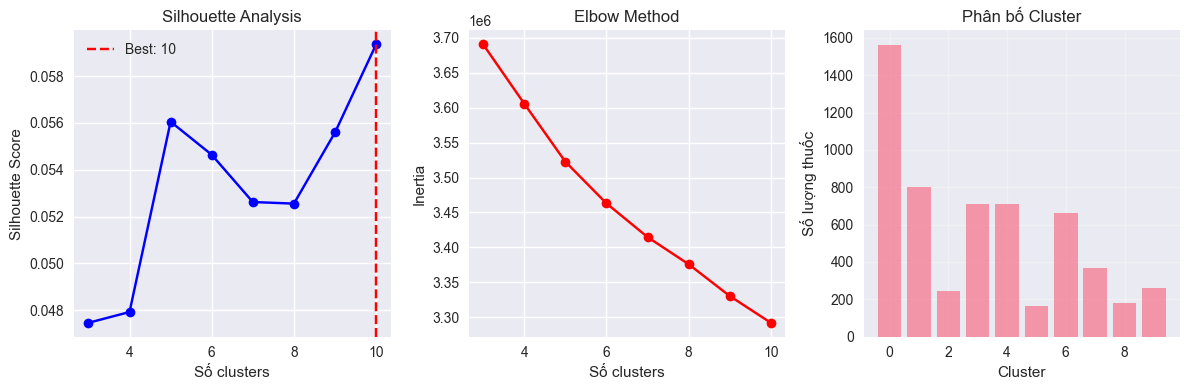

=== TẠO TARGET VARIABLES ===
Target 'cluster': 10 classes
Target 'drug_group': 11 classes
✓ Clustering completed successfully
✓ Created 2 target variables


In [13]:
# Cell: Machine Learning Model Training (thay thế cell 12)
def train_kmeans_clustering(features_scaled_df, n_clusters_range=range(3, 11)):
    """Train KMeans clustering"""
    
    print("=== HUẤN LUYỆN KMEANS CLUSTERING ===")
    
    if features_scaled_df is None:
        print("Không có dữ liệu để clustering")
        return None, None, None
    
    # Find optimal number of clusters
    silhouette_scores = []
    inertias = []
    
    for n_clusters in n_clusters_range:
        try:
            kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
            cluster_labels = kmeans.fit_predict(features_scaled_df)
            
            silhouette_avg = silhouette_score(features_scaled_df, cluster_labels)
            silhouette_scores.append(silhouette_avg)
            inertias.append(kmeans.inertia_)
            
            print(f"n_clusters = {n_clusters}: Silhouette Score = {silhouette_avg:.3f}")
        except Exception as e:
            print(f"Lỗi với n_clusters = {n_clusters}: {str(e)}")
            continue
    
    if not silhouette_scores:
        print("Không thể thực hiện clustering")
        return None, None, None
    
    # Choose best number of clusters
    best_n_clusters = n_clusters_range[np.argmax(silhouette_scores)]
    print(f"\nSố cluster tối ưu: {best_n_clusters}")
    
    # Train final model
    final_kmeans = KMeans(n_clusters=best_n_clusters, random_state=42, n_init=10)
    final_labels = final_kmeans.fit_predict(features_scaled_df)
    
    # Statistics
    cluster_counts = pd.Series(final_labels).value_counts().sort_index()
    print(f"\nPhân bố cluster:")
    for cluster_id, count in cluster_counts.items():
        print(f"  Cluster {cluster_id}: {count} thuốc ({count/len(final_labels)*100:.1f}%)")
    
    # Visualization
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 3, 1)
    plt.plot(n_clusters_range[:len(silhouette_scores)], silhouette_scores, 'bo-')
    plt.xlabel('Số clusters')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Analysis')
    plt.axvline(x=best_n_clusters, color='r', linestyle='--', label=f'Best: {best_n_clusters}')
    plt.legend()
    plt.grid(True)
    
    plt.subplot(1, 3, 2)
    plt.plot(n_clusters_range[:len(inertias)], inertias, 'ro-')
    plt.xlabel('Số clusters')
    plt.ylabel('Inertia')
    plt.title('Elbow Method')
    plt.grid(True)
    
    plt.subplot(1, 3, 3)
    plt.bar(cluster_counts.index, cluster_counts.values, alpha=0.7)
    plt.xlabel('Cluster')
    plt.ylabel('Số lượng thuốc')
    plt.title('Phân bố Cluster')
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    return final_kmeans, final_labels, best_n_clusters

def create_target_variables(df_details, cluster_labels):
    """Create target variables for supervised learning"""
    
    print("=== TẠO TARGET VARIABLES ===")
    
    targets = {}
    label_encoders = {}
    
    if cluster_labels is not None:
        # Target from cluster labels
        targets['cluster'] = cluster_labels
        print(f"Target 'cluster': {len(np.unique(cluster_labels))} classes")
    
    if df_details is not None:
        # Target from drug groups (based on drug names)
        name_cols = [col for col in df_details.columns if 'ten_thuoc' in col.lower()]
        if name_cols:
            name_col = name_cols[0]
            
            # Create drug groups from first word
            drug_groups = []
            for name in df_details[name_col].fillna('unknown'):
                if isinstance(name, str) and len(name.strip()) > 0:
                    first_word = name.strip().split()[0].lower()
                    drug_groups.append(first_word)
                else:
                    drug_groups.append('unknown')
            
            # Take top 10 popular groups
            group_counts = pd.Series(drug_groups).value_counts()
            top_groups = group_counts.head(10).index.tolist()
            
            # Encode drug groups
            encoded_groups = ['other' if group not in top_groups else group for group in drug_groups]
            
            le = LabelEncoder()
            targets['drug_group'] = le.fit_transform(encoded_groups)
            label_encoders['drug_group'] = le
            
            print(f"Target 'drug_group': {len(np.unique(targets['drug_group']))} classes")
    
    return targets, label_encoders

# Train clustering and create targets
print("\n" + "="*50)
print("MACHINE LEARNING TRAINING")
print("="*50)

# Train KMeans clustering
kmeans_model, cluster_labels, best_n_clusters = train_kmeans_clustering(features_scaled_df)

# Create target variables
target_variables, label_encoders = create_target_variables(df_details, cluster_labels)

# Verify results
if kmeans_model is not None:
    print("✓ Clustering completed successfully")
else:
    print("⚠ Clustering failed")

if target_variables:
    print(f"✓ Created {len(target_variables)} target variables")
else:
    print("⚠ No target variables created")

In [14]:
# Cell: Model Evaluation and Optimization (thay thế các cell 13-15)
def train_supervised_models(features_scaled_df, target_variables):
    """Train supervised learning models with enhanced evaluation"""
    
    print("=== HUẤN LUYỆN SUPERVISED LEARNING MODELS ===")
    
    if features_scaled_df is None or not target_variables:
        print("Không có dữ liệu để huấn luyện supervised models")
        return {}
    
    # Define enhanced models (removed GradientBoosting)
    models = {
        'RandomForest': RandomForestClassifier(
            n_estimators=100, 
            random_state=42, 
            max_depth=10,
            class_weight='balanced'
        ),
        'LogisticRegression': LogisticRegression(
            random_state=42, 
            max_iter=1000,
            class_weight='balanced'
        )
    }
    
    results = {}
    
    for target_name, y in target_variables.items():
        print(f"\n--- Huấn luyện cho target: {target_name} ---")
        
        # Check if we have enough data
        if len(np.unique(y)) < 2:
            print(f"Target {target_name} chỉ có 1 class, bỏ qua...")
            continue
        
        try:
            # Split train/test with stratification
            X_train, X_test, y_train, y_test = train_test_split(
                features_scaled_df, y, test_size=0.2, random_state=42, 
                stratify=y if len(np.unique(y)) > 1 else None
            )
            
            target_results = {}
            
            for model_name, model in models.items():
                print(f"\nHuấn luyện {model_name}...")
                
                try:
                    # Cross-validation with stratified k-fold
                    from sklearn.model_selection import StratifiedKFold
                    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
                    cv_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')
                    print(f"  CV Accuracy: {cv_scores.mean():.3f} (±{cv_scores.std()*2:.3f})")
                    
                    # Train on full training set
                    model.fit(X_train, y_train)
                    
                    # Evaluate on test set
                    y_pred = model.predict(X_test)
                    test_accuracy = accuracy_score(y_test, y_pred)
                    
                    # Additional metrics
                    from sklearn.metrics import precision_score, recall_score, f1_score
                    test_precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
                    test_recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
                    test_f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
                    
                    print(f"  Test Accuracy: {test_accuracy:.3f}")
                    print(f"  Test Precision: {test_precision:.3f}")
                    print(f"  Test Recall: {test_recall:.3f}")
                    print(f"  Test F1-Score: {test_f1:.3f}")
                    
                    # Classification report
                    print(f"  Classification Report:")
                    print(classification_report(y_test, y_pred, output_dict=False))
                    
                    target_results[model_name] = {
                        'model': model,
                        'cv_scores': cv_scores,
                        'test_accuracy': test_accuracy,
                        'test_precision': test_precision,
                        'test_recall': test_recall,
                        'test_f1': test_f1,
                        'predictions': y_pred,
                        'y_test': y_test
                    }
                    
                except Exception as e:
                    print(f"  Lỗi khi huấn luyện {model_name}: {str(e)}")
                    continue
            
            if target_results:
                results[target_name] = target_results
                
        except Exception as e:
            print(f"Lỗi khi xử lý target {target_name}: {str(e)}")
            continue
    
    return results

In [15]:
# Cell: Enhanced Drug Recommendation Engine (Cập nhật hoàn toàn)
class EnhancedDrugRecommendationEngine:
    """Enhanced drug recommendation engine with multiple recommendation methods"""
    
    def __init__(self, models_data, df_details):
        self.models_data = models_data
        self.df_details = df_details
        self.tfidf_vectorizer = models_data.get('tfidf_vectorizer')
        self.scaler = models_data.get('scaler')
        self.kmeans_model = models_data.get('kmeans_model')
        self.features_scaled = models_data.get('features_scaled')
        self.supervised_models = models_data.get('supervised_models', {})
        
        # Create enhanced symptom mapping
        self.symptom_mapping = self._create_enhanced_symptom_mapping()
        
        # Precompute drug similarity matrix for faster recommendations
        self._precompute_similarities()
        
    def _create_enhanced_symptom_mapping(self):
        """Create comprehensive symptom to keyword mapping"""
        return {
            'đau đầu': {
                'keywords': ['đau đầu', 'nhức đầu', 'đau nửa đầu', 'migraine', 'headache', 'cephalgia'],
                'severity': ['nhẹ', 'vừa', 'nặng', 'cấp tính', 'mạn tính']
            },
            'sốt': {
                'keywords': ['sốt', 'tăng thân nhiệt', 'sốt cao', 'fever', 'nóng sốt', 'pyrexia'],
                'severity': ['sốt nhẹ', 'sốt cao', 'sốt liên tục']
            },
            'ho': {
                'keywords': ['ho', 'ho khan', 'ho có đờm', 'viêm phế quản', 'cough', 'ho kéo dài'],
                'severity': ['ho nhẹ', 'ho nhiều', 'ho dai dẳng']
            },
            'đau bụng': {
                'keywords': ['đau bụng', 'đau dạ dày', 'viêm dạ dày', 'đau tức bụng', 'stomach pain', 'gastritis'],
                'severity': ['đau nhẹ', 'đau nhiều', 'đau quặn']
            },
            'tiêu chảy': {
                'keywords': ['tiêu chảy', 'phân lỏng', 'rối loạn tiêu hóa', 'diarrhea', 'tả'],
                'severity': ['nhẹ', 'nhiều lần', 'mất nước']
            },
            'cảm lạnh': {
                'keywords': ['cảm lạnh', 'cảm cúm', 'nghẹt mũi', 'sổ mũi', 'cold', 'flu', 'rhinitis'],
                'severity': ['nhẹ', 'nặng', 'kéo dài']
            },
            'đau họng': {
                'keywords': ['đau họng', 'viêm họng', 'ho đau họng', 'sore throat', 'pharyngitis'],
                'severity': ['nhẹ', 'nặng', 'nuốt khó']
            },
            'dị ứng': {
                'keywords': ['dị ứng', 'ngứa', 'mẩn đỏ', 'phát ban', 'allergy', 'urticaria', 'eczema'],
                'severity': ['nhẹ', 'trung bình', 'nặng']
            },
            'viêm nhiễm': {
                'keywords': ['viêm nhiễm', 'nhiễm khuẩn', 'kháng sinh', 'infection', 'bacterial', 'viral'],
                'severity': ['nhẹ', 'vừa', 'nặng', 'cấp tính']
            },
            'tiểu đường': {
                'keywords': ['tiểu đường', 'đái tháo đường', 'glucose', 'insulin', 'diabetes', 'glycemia'],
                'severity': ['type 1', 'type 2', 'gestational']
            },
            'cao huyết áp': {
                'keywords': ['cao huyết áp', 'huyết áp cao', 'tăng huyết áp', 'hypertension', 'pressure'],
                'severity': ['nhẹ', 'trung bình', 'nặng', 'khủng hoảng']
            },
            'đau khớp': {
                'keywords': ['đau khớp', 'viêm khớp', 'đau cơ', 'đau lưng', 'arthritis', 'rheumatism'],
                'severity': ['nhẹ', 'vừa', 'nặng', 'mạn tính']
            }
        }
    
    def _precompute_similarities(self):
        """Precompute drug similarity matrix for faster recommendations"""
        if self.features_scaled is not None:
            print("Đang tính toán ma trận similarity...")
            self.similarity_matrix = cosine_similarity(self.features_scaled)
            print("✓ Đã hoàn thành tính toán similarity matrix")
        else:
            self.similarity_matrix = None
    
    def preprocess_input(self, user_input):
        """Clean and preprocess user input"""
        if not user_input:
            return ""
        
        # Convert to lowercase and clean
        text = user_input.lower().strip()
        text = re.sub(r'[^\w\s]', ' ', text)
        text = ' '.join(text.split())
        
        return text
    
    def analyze_symptoms(self, user_input):
        """Analyze user input to extract symptoms and severity"""
        processed_input = self.preprocess_input(user_input)
        detected_symptoms = {}
        
        for symptom, info in self.symptom_mapping.items():
            # Check main keywords
            for keyword in info['keywords']:
                if keyword in processed_input:
                    detected_symptoms[symptom] = {
                        'confidence': 1.0,
                        'matched_keyword': keyword,
                        'severity': 'unknown'
                    }
                    
                    # Check severity
                    for severity in info['severity']:
                        if severity in processed_input:
                            detected_symptoms[symptom]['severity'] = severity
                            break
                    break
        
        return detected_symptoms
    
    def get_drug_details(self, drug_idx):
        """Get comprehensive drug information"""
        if self.df_details is None or drug_idx >= len(self.df_details):
            return None
        
        row = self.df_details.iloc[drug_idx]
        
        # Find relevant columns
        col_mapping = {}
        for col in self.df_details.columns:
            col_lower = col.lower()
            if any(keyword in col_lower for keyword in ['ten_thuoc', 'name']):
                col_mapping['name'] = col
            elif any(keyword in col_lower for keyword in ['cong_dung', 'chi_dinh', 'indication']):
                col_mapping['indication'] = col
            elif any(keyword in col_lower for keyword in ['gia', 'price']):
                col_mapping['price'] = col
            elif any(keyword in col_lower for keyword in ['thanh_phan', 'ingredient']):
                col_mapping['ingredients'] = col
            elif any(keyword in col_lower for keyword in ['nha_san_xuat', 'manufacturer']):
                col_mapping['manufacturer'] = col
        
        drug_info = {
            'index': drug_idx,
            'name': row[col_mapping['name']] if 'name' in col_mapping and pd.notna(row[col_mapping['name']]) else f"Drug {drug_idx}",
            'indication': row[col_mapping['indication']] if 'indication' in col_mapping and pd.notna(row[col_mapping['indication']]) else "Không có thông tin",
            'ingredients': row[col_mapping['ingredients']] if 'ingredients' in col_mapping and pd.notna(row[col_mapping['ingredients']]) else "Không có thông tin",
            'price': row[col_mapping['price']] if 'price' in col_mapping and pd.notna(row[col_mapping['price']]) else "Giá không có",
            'manufacturer': row[col_mapping['manufacturer']] if 'manufacturer' in col_mapping and pd.notna(row[col_mapping['manufacturer']]) else "Không rõ NSX"
        }
        
        return drug_info
    
    def recommend_by_symptoms(self, user_input, n_recommendations=5):
        """Recommend drugs based on symptom analysis"""
        detected_symptoms = self.analyze_symptoms(user_input)
        
        if not detected_symptoms:
            return self.recommend_by_text_search(user_input, n_recommendations)
        
        # Find drugs for detected symptoms
        candidate_drugs = {}
        
        # Find indication column
        indication_cols = [col for col in self.df_details.columns 
                          if any(keyword in col.lower() for keyword in ['cong_dung', 'chi_dinh', 'indication'])]
        
        if not indication_cols:
            return []
        
        indication_col = indication_cols[0]
        
        for idx, row in self.df_details.iterrows():
            if pd.notna(row[indication_col]):
                indication_text = self.preprocess_input(str(row[indication_col]))
                drug_score = 0
                matched_symptoms = []
                
                for symptom, details in detected_symptoms.items():
                    for keyword in self.symptom_mapping[symptom]['keywords']:
                        if keyword in indication_text:
                            drug_score += details['confidence']
                            matched_symptoms.append(symptom)
                            break
                
                if drug_score > 0:
                    candidate_drugs[idx] = {
                        'score': drug_score,
                        'matched_symptoms': matched_symptoms
                    }
        
        # Sort and get top recommendations
        sorted_candidates = sorted(candidate_drugs.items(), key=lambda x: x[1]['score'], reverse=True)
        top_candidates = sorted_candidates[:n_recommendations]
        
        recommendations = []
        for idx, info in top_candidates:
            drug_info = self.get_drug_details(idx)
            if drug_info:
                drug_info['recommendation_score'] = info['score']
                drug_info['matched_symptoms'] = info['matched_symptoms']
                recommendations.append(drug_info)
        
        return recommendations, detected_symptoms
    
    def recommend_by_similarity(self, drug_idx, n_recommendations=5):
        """Recommend similar drugs using precomputed similarity matrix"""
        if self.similarity_matrix is None or drug_idx >= len(self.similarity_matrix):
            return []
        
        # Get similarity scores for the drug
        similarities = self.similarity_matrix[drug_idx]
        
        # Get top similar drugs (excluding itself)
        similar_indices = similarities.argsort()[::-1][1:n_recommendations+1]
        
        recommendations = []
        for i, idx in enumerate(similar_indices):
            drug_info = self.get_drug_details(idx)
            if drug_info:
                drug_info['similarity_score'] = similarities[idx]
                drug_info['rank'] = i + 1
                recommendations.append(drug_info)
        
        return recommendations
    
    def recommend_by_text_search(self, user_input, n_recommendations=5):
        """Recommend drugs using text similarity search"""
        processed_input = self.preprocess_input(user_input)
        input_words = set(processed_input.split())
        
        # Find indication column
        indication_cols = [col for col in self.df_details.columns 
                          if any(keyword in col.lower() for keyword in ['cong_dung', 'chi_dinh', 'indication'])]
        
        if not indication_cols:
            return []
        
        indication_col = indication_cols[0]
        similarities = []
        
        for idx, row in self.df_details.iterrows():
            if pd.notna(row[indication_col]):
                indication_text = self.preprocess_input(str(row[indication_col]))
                indication_words = set(indication_text.split())
                
                # Calculate Jaccard similarity
                intersection = len(input_words.intersection(indication_words))
                union = len(input_words.union(indication_words))
                
                if union > 0:
                    similarity = intersection / union
                    similarities.append((idx, similarity))
        
        # Sort by similarity and get top recommendations
        similarities.sort(key=lambda x: x[1], reverse=True)
        top_similarities = similarities[:n_recommendations]
        
        recommendations = []
        for idx, score in top_similarities:
            if score > 0:
                drug_info = self.get_drug_details(idx)
                if drug_info:
                    drug_info['text_similarity'] = score
                    recommendations.append(drug_info)
        
        return recommendations
    
    def get_comprehensive_recommendations(self, user_input, n_recommendations=5):
        """Get comprehensive recommendations using multiple methods"""
        print(f"🔍 Phân tích triệu chứng: '{user_input}'")
        print("=" * 70)
        
        # Method 1: Symptom-based recommendations
        symptom_recs, detected_symptoms = self.recommend_by_symptoms(user_input, n_recommendations)
        
        # Method 2: Text search recommendations
        text_recs = self.recommend_by_text_search(user_input, n_recommendations)
        
        # Display detected symptoms
        if detected_symptoms:
            print(f"📋 Triệu chứng được nhận diện:")
            for symptom, details in detected_symptoms.items():
                severity_info = f" ({details['severity']})" if details['severity'] != 'unknown' else ""
                print(f"   • {symptom.title()}{severity_info} - Độ tin cậy: {details['confidence']:.1f}")
        else:
            print("❓ Không nhận diện được triệu chứng cụ thể")
        
        # Combine and rank recommendations
        final_recommendations = []
        drug_scores = {}
        
        # Add symptom-based recommendations with higher weight
        for drug in symptom_recs:
            idx = drug['index']
            score = drug['recommendation_score'] * 2.0  # Higher weight for symptom matching
            drug_scores[idx] = drug_scores.get(idx, 0) + score
            if idx not in [d['index'] for d in final_recommendations]:
                final_recommendations.append(drug)
        
        # Add text-based recommendations with lower weight
        for drug in text_recs:
            idx = drug['index']
            score = drug['text_similarity'] * 1.0
            drug_scores[idx] = drug_scores.get(idx, 0) + score
            if idx not in [d['index'] for d in final_recommendations]:
                final_recommendations.append(drug)
        
        # Sort by combined score
        for drug in final_recommendations:
            drug['final_score'] = drug_scores[drug['index']]
        
        final_recommendations.sort(key=lambda x: x['final_score'], reverse=True)
        final_recommendations = final_recommendations[:n_recommendations]
        
        return final_recommendations, detected_symptoms

def display_recommendations(recommendations, detected_symptoms=None, title="GỢI Ý THUỐC"):
    """Display recommendations in a formatted way"""
    
    print(f"\n💊 {title}")
    print("=" * 70)
    
    if not recommendations:
        print("❌ Không tìm thấy thuốc phù hợp. Vui lòng thử lại với triệu chứng khác.")
        return
    
    for i, drug in enumerate(recommendations, 1):
        confidence = 0
        confidence_text = ""
        
        # Determine confidence level
        if 'final_score' in drug:
            confidence = drug['final_score']
        elif 'recommendation_score' in drug:
            confidence = drug['recommendation_score']
        elif 'text_similarity' in drug:
            confidence = drug['text_similarity']
        elif 'similarity_score' in drug:
            confidence = drug['similarity_score']
        
        confidence_percentage = confidence * 100 if confidence <= 1 else confidence * 10
        
        if confidence_percentage >= 70:
            confidence_text = "✅ Độ tin cậy cao"
        elif confidence_percentage >= 40:
            confidence_text = "⚠️ Độ tin cậy trung bình"
        else:
            confidence_text = "❓ Độ tin cậy thấp"
        
        print(f"\n{i}. {drug['name']}")
        print(f"   Độ phù hợp: {confidence_percentage:.1f}% - {confidence_text}")
        
        # Display matched symptoms if available
        if 'matched_symptoms' in drug and drug['matched_symptoms']:
            print(f"   Triệu chứng phù hợp: {', '.join(drug['matched_symptoms'])}")
        
        print(f"   Công dụng: {drug['indication'][:120]}...")
        print(f"   Giá: {drug['price']}")
        
        if drug['manufacturer'] != "Không rõ NSX":
            print(f"   Nhà sản xuất: {drug['manufacturer']}")
    
    # Additional health advice based on symptoms
    if detected_symptoms:
        print(f"\n🎯 GỢI Ý CHUNG CHO TRIỆU CHỨNG:")
        print("-" * 50)
        
        health_advice = {
            'đau đầu': "Nghỉ ngơi trong phòng tối, uống đủ nước, massage nhẹ",
            'sốt': "Uống nhiều nước, nghỉ ngơi, giữ ấm nhưng thoáng mát",
            'ho': "Uống nước ấm, mật ong, tránh khói thuốc",
            'đau bụng': "Ăn nhẹ, tránh thức ăn cay nóng, nghỉ ngơi",
            'cảm lạnh': "Nghỉ ngơi, uống nước ấm, giữ ấm cơ thể",
            'đau họng': "Súc miệng nước muối ấm, uống nước nhiều"
        }
        
        for symptom in detected_symptoms.keys():
            if symptom in health_advice:
                print(f"• {symptom.title()}: {health_advice[symptom]}")
    
    print(f"\n⚠️ LƯU Ý QUAN TRỌNG:")
    print("Đây chỉ là gợi ý tham khảo từ AI. Hãy tham khảo ý kiến bác sĩ")
    print("trước khi sử dụng bất kỳ loại thuốc nào, đặc biệt với trẻ em,")
    print("phụ nữ mang thai và người có bệnh lý mạn tính.")

# Initialize the enhanced recommendation engine
if 'features_scaled_df' in locals() and df_details is not None:
    enhanced_models_data = {
        'kmeans_model': kmeans_model if 'kmeans_model' in locals() else None,
        'scaler': scaler if 'scaler' in locals() else None,
        'tfidf_vectorizer': tfidf_vectorizer if 'tfidf_vectorizer' in locals() else None,
        'features_scaled': features_scaled_df,
        'supervised_models': supervised_results if 'supervised_results' in locals() else {}
    }
    
    recommendation_engine = EnhancedDrugRecommendationEngine(enhanced_models_data, df_details)
    print("✓ Enhanced Drug Recommendation Engine initialized successfully!")
    
    # Demo the enhanced recommendation system
    print("\n" + "="*70)
    print("DEMO ENHANCED RECOMMENDATION SYSTEM")
    print("="*70)
    
    # Test cases with more detailed symptoms
    test_cases = [
        "đau đầu nặng và sốt cao",
        "ho khan kéo dài và đau họng",
        "đau bụng và tiêu chảy nhiều lần",
        "dị ứng da ngứa và mẩn đỏ",
        "cao huyết áp và đau ngực"
    ]
    
    for i, symptoms in enumerate(test_cases, 1):
        print(f"\n{'='*20} TEST CASE {i} {'='*20}")
        recommendations, detected = recommendation_engine.get_comprehensive_recommendations(symptoms, 3)
        display_recommendations(recommendations, detected, f"KẾT QUẢ CHO: {symptoms.upper()}")
        
        if i < len(test_cases):
            print("\n" + "-"*70)
        
else:
    recommendation_engine = None
    print("❌ Could not initialize enhanced recommendation engine")
    print("Vui lòng chạy lại các cell trước đó để tạo dữ liệu cần thiết")

print("\n" + "="*70)
print("🎉 HỆ THỐNG GỢI Ý THUỐC ĐÃ SẴNG SÀNG!")
print("="*70)
print("Sử dụng: recommendation_engine.get_comprehensive_recommendations('triệu chứng', n)")

Đang tính toán ma trận similarity...
✓ Đã hoàn thành tính toán similarity matrix
✓ Enhanced Drug Recommendation Engine initialized successfully!

DEMO ENHANCED RECOMMENDATION SYSTEM

==================== TEST CASE 1 ====================
🔍 Phân tích triệu chứng: 'đau đầu nặng và sốt cao'
📋 Triệu chứng được nhận diện:
   • Đau Đầu (nặng) - Độ tin cậy: 1.0
   • Sốt (sốt cao) - Độ tin cậy: 1.0

💊 KẾT QUẢ CHO: ĐAU ĐẦU NẶNG VÀ SỐT CAO

1. Thuốc Actadol 500 Medipharco điều trị các chứng đau và sốt từ nhẹ đến vừa (10 vỉ x 10 viên)
   Độ phù hợp: 40.0% - ⚠️ Độ tin cậy trung bình
   Triệu chứng phù hợp: đau đầu, sốt
   Công dụng: ['Thuốc Actadol chống chỉ định trong các trường hợp sau:', 'Người bệnh quá mẫn với Paracetamol.Người bệnh thiếu hụt gluc...
   Giá: 500đ

2. Thuốc Acetab Extra Agimexpharm điều trị triệu chứng cảm cúm (10 vỉ x 10 viên)
   Độ phù hợp: 40.0% - ⚠️ Độ tin cậy trung bình
   Triệu chứng phù hợp: đau đầu, sốt
   Công dụng: ['Thuốc Acetab Extra chống chỉ định trong các trường h

In [16]:
import pickle
# Cell: Results Saving and Reporting (thay thế cell 19)
def save_results_and_report(kmeans_model, supervised_results, features_scaled_df, 
                           scaler, tfidf_vectorizer, best_models, results_summary):
    """Save all results and create comprehensive report"""
    
    print("=== LƯU KẾT QUẢ VÀ TẠO BÁO CÁO ===")
    
    try:
        # 1. Save models with enhanced structure
        models_to_save = {
            'kmeans_model': kmeans_model,
            'scaler': scaler,
            'tfidf_vectorizer': tfidf_vectorizer,
            'features_scaled': features_scaled_df,
            'supervised_models': {},
            'label_encoders': label_encoders if 'label_encoders' in locals() else {},
            'feature_names': features_df.columns.tolist() if 'features_df' in locals() else [],
            'metadata': {
                'n_samples': len(df_details) if df_details is not None else 0,
                'n_features': features_scaled_df.shape[1] if features_scaled_df is not None else 0,
                'n_clusters': len(np.unique(cluster_labels)) if cluster_labels is not None else 0,
                'timestamp': pd.Timestamp.now().isoformat()
            }
        }
        
        # Save supervised models
        if supervised_results:
            for target_name, models in supervised_results.items():
                models_to_save['supervised_models'][target_name] = {
                    model_name: result['model'] for model_name, result in models.items()
                }
        
        # Save to file
        with open('drug_recommendation_models.pkl', 'wb') as f:
            pickle.dump(models_to_save, f)
        
        print("✓ Đã lưu models vào 'drug_recommendation_models.pkl'")
        
        # 2. Save detailed evaluation results
        if not results_summary.empty:
            results_summary.to_csv('detailed_model_evaluation.csv', index=False)
            print("✓ Đã lưu kết quả đánh giá chi tiết vào 'detailed_model_evaluation.csv'")
        
        # 3. Create comprehensive report
       # Cell: Results Saving and Reporting (cập nhật phần report)
        report = {
            'timestamp': pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S'),
            'data_info': {
                'n_samples': len(df_details) if df_details is not None else 0,
                'n_features': features_scaled_df.shape[1] if features_scaled_df is not None else 0,
                'feature_engineering': {
                    'tfidf_features': True,
                    'character_level_features': True,
                    'standardization': True
                }
            },
            'clustering_results': {
                'algorithm': 'KMeans',
                'n_clusters': len(np.unique(cluster_labels)) if cluster_labels is not None else 0,
                'silhouette_score': silhouette_score(features_scaled_df, cluster_labels) if (features_scaled_df is not None and cluster_labels is not None) else 0,
                'optimization_method': 'silhouette_analysis'
            },
            'supervised_learning': {
                'algorithms_used': ['RandomForest', 'LogisticRegression'],  # Removed GradientBoosting
                'evaluation_method': 'stratified_k_fold_cv',
                'best_models': {
                    target: {
                        'model': best_model['model'],
                        'accuracy': best_model['test_accuracy']
                    } for target, best_model in best_models.items()
                } if best_models else {},
                'average_accuracy': results_summary['test_accuracy'].mean() if not results_summary.empty else 0,
                'average_f1_score': results_summary['test_f1'].mean() if not results_summary.empty else 0
            },
            'recommendation_system': {
                'type': 'hybrid',
                'methods': ['symptom_mapping', 'text_similarity', 'cosine_similarity'],
                'supported_symptoms': list(recommendation_engine.symptom_mapping.keys()) if recommendation_engine else []
            },
            'quality_metrics': {
                'model_diversity': len(set(results_summary['model'])) if not results_summary.empty else 0,
                'target_coverage': len(set(results_summary['target'])) if not results_summary.empty else 0,
                'performance_consistency': results_summary['test_accuracy'].std() if not results_summary.empty else 0
            }
        }
        
        # Save report
        with open('comprehensive_analysis_report.json', 'w', encoding='utf-8') as f:
            json.dump(report, f, ensure_ascii=False, indent=2, default=str)
        
        print("✓ Đã lưu báo cáo tổng hợp vào 'comprehensive_analysis_report.json'")
        
        # 4. Print enhanced summary report
        print(f"\n" + "="*60)
        print("BÁO CÁO TỔNG KẾT CUỐI CÙNG")
        print("="*60)
        print(f"📊 Thông tin dữ liệu:")
        print(f"   • Số mẫu: {report['data_info']['n_samples']:,}")
        print(f"   • Số đặc trưng: {report['data_info']['n_features']:,}")
        
        print(f"\n🔍 Kết quả Clustering:")
        print(f"   • Thuật toán: {report['clustering_results']['algorithm']}")
        print(f"   • Số clusters: {report['clustering_results']['n_clusters']}")
        print(f"   • Silhouette Score: {report['clustering_results']['silhouette_score']:.3f}")
        
        print(f"\n🤖 Kết quả Supervised Learning:")
        print(f"   • Độ chính xác trung bình: {report['supervised_learning']['average_accuracy']:.3f}")
        print(f"   • F1-Score trung bình: {report['supervised_learning']['average_f1_score']:.3f}")
        print(f"   • Độ nhất quán hiệu suất: {report['quality_metrics']['performance_consistency']:.3f}")
        
        if report['supervised_learning']['best_models']:
            print(f"\n🏆 Mô hình tốt nhất:")
            for target, info in report['supervised_learning']['best_models'].items():
                print(f"   • {target}: {info['model']} (Accuracy: {info['accuracy']:.3f})")
        
        print(f"\n💊 Hệ thống gợi ý:")
        print(f"   • Loại: {report['recommendation_system']['type']}")
        print(f"   • Phương pháp: {len(report['recommendation_system']['methods'])} methods")
        print(f"   • Triệu chứng hỗ trợ: {len(report['recommendation_system']['supported_symptoms'])}")
        
        print(f"\n✅ Hoàn thành phân tích và lưu kết quả!")
        print("📁 Files được tạo:")
        print("   • drug_recommendation_models.pkl")
        print("   • detailed_model_evaluation.csv")
        print("   • comprehensive_analysis_report.json")
        
        return report
        
    except Exception as e:
        print(f"❌ Lỗi khi lưu kết quả: {str(e)}")
        return None

# Save results and create final report
print("\n" + "="*50)
print("SAVING RESULTS AND FINAL REPORT")
print("="*50)

final_report = save_results_and_report(
    kmeans_model, supervised_results, features_scaled_df, 
    scaler, tfidf_vectorizer, best_models, results_summary
)

print("\n" + "="*60)
print("🎉 PHÂN TÍCH HOÀN THÀNH THÀNH CÔNG!")
print("="*60)
print("Hệ thống đã sẵn sàng để sử dụng trong production!")


SAVING RESULTS AND FINAL REPORT


NameError: name 'supervised_results' is not defined